# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
from collections import Counter
from scipy.stats import randint
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import f1_score

In [121]:
df = pd.read_csv(r"./data/Final_Model.csv")
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [122]:
X=df.drop(['credit_risk'],axis=1)
Y=df['credit_risk']
Y

0      1
1      1
2      1
3      1
4      1
      ..
244    0
245    0
246    0
247    0
248    0
Name: credit_risk, Length: 249, dtype: int64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
# Dividir los datos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)

print('Dimensión de datos de entrada para entrenamiento y validación:', Xtrain.shape)
print('Dimensión de datos de entrada para prueba:', Xtest.shape)

print('Dimensión de variable de salida para entrenamiento y validación:', ytrain.shape)
print('Dimensión de variable de salida para prueba:', ytest.shape)

Dimensión de datos de entrada para entrenamiento y validación: (211, 14)
Dimensión de datos de entrada para prueba: (38, 14)
Dimensión de variable de salida para entrenamiento y validación: (211,)
Dimensión de variable de salida para prueba: (38,)


In [125]:
# Obtener estadísticas descriptivas de las columnas numéricas en X_train
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,-0.022237,-0.033870,0.013463,-0.047870,-0.039814,0.009729,0.014351,0.037839,-0.011513,0.020932,-0.034528,0.015123,0.011952,-0.013405
std,1.007663,0.981346,0.996879,0.981948,1.009190,1.008764,1.000494,0.998422,0.999814,1.005494,0.988506,0.986455,1.013031,0.997526
min,-1.532680,-1.433187,-2.653565,-1.438390,-2.849071,-0.819956,-2.209825,-2.102864,-2.220039,-1.451964,-1.382712,-1.330826,-0.702276,-0.707107
25%,-0.725836,-0.742260,-0.713072,-0.777580,-0.695497,-0.819956,-0.390829,-1.143865,-0.884798,-0.561474,-1.382712,-0.756518,-0.702276,-0.707107
50%,0.887853,-0.051334,-0.713072,-0.116770,0.003890,-0.819956,-0.390829,0.774131,0.450443,-0.561474,-0.253875,-0.182210,-0.702276,-0.707107
75%,0.887853,0.639593,1.227420,0.544040,0.703756,1.178938,0.518670,0.774131,0.450443,1.219507,0.874962,0.392098,1.311435,1.414214
max,0.887853,2.712372,1.227420,2.526470,1.962702,1.576673,1.428168,0.774131,1.785683,1.219507,2.003799,2.880765,2.740186,1.414214


In [126]:
ytrain_numeric = ytrain.astype(int)
result = ytrain_numeric.sum() / ytrain_numeric.shape[0]
result

0.7914691943127962

In [ ]:
#del df['other_debtors']
#del df['other_installment_plans']
#del df['housing']
#del df['job']
#del df['people_liable']
#del df['foreign_worker']

In [127]:
var_num=["duration", "amount", "age"]
#var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex", "other_debtors", "other_installment_plans","housing"]
#var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits","job"]
#var_bin=["telephone", "foreign_worker", "credit_risk", "person_liable"]
var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex"]
var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits"]
var_bin=["telephone", "credit_risk", "person_liable"]

In [128]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps=[('impMediana', SimpleImputer(strategy='median')),('escalaNum', MinMaxScaler(feature_range=(1, 2)))])
num_pipeline_nombres = var_num

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps=[('impModa', SimpleImputer(strategy='most_frequent'))])
catImp_pipeline_nombres = var_ord

catOHE_pipeline = Pipeline(steps=[('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])
catOHE_pipeline_nombres = var_nom

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[('numpipe', num_pipeline, num_pipeline_nombres),('catimp', catImp_pipeline, catImp_pipeline_nombres),
 ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)], remainder='passthrough')

columnasTransformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('numpipe',
                                 Pipeline(steps=[('impMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('escalaNum',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['duration', 'amount', 'age']),
                                ('catimp',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['employment_duration', 'installment_rate',
                                  'present_residence', 'property',
                                  'number_credits']),
                                ('catohe',
                                 Pipeline(steps=[('OneHotE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['status', 'credit_history', 'purpose',
                                  'savings', 'personal_status_sex'])])

In [129]:
# Ajustar el ColumnTransformer a los datos de entrenamiento
columnasTransformer.fit(Xtrain)

# Transformar los datos de entrenamiento y validación utilizando el ColumnTransformer ajustado
X_train_transformado = columnasTransformer.transform(Xtrain)
X_val_transformado = columnasTransformer.transform(Xtest)

# Convertir las etiquetas de entrenamiento y validación a tipo entero
ytrain = ytrain.astype(int)
yval = ytest.astype(int)

# Crear un clasificador Dummy con estrategia "stratified"
dummy_classifier = DummyClassifier(strategy="stratified", random_state=0)

# Ajustar el clasificador Dummy a los datos de entrenamiento transformados
dummy_classifier.fit(X_train_transformado, ytrain)

# Predecir las etiquetas de entrenamiento y validación utilizando el clasificador Dummy
y_train_pred = dummy_classifier.predict(X_train_transformado)
y_val_pred = dummy_classifier.predict(X_val_transformado)

# Calcular la exactitud (accuracy) de entrenamiento y validación
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)

# Calcular el F1-Score de entrenamiento y validación
train_f1 = f1_score(ytrain, y_train_pred)
val_f1 = f1_score(yval, y_val_pred)

# Calcular la precisión (precision) de entrenamiento y validación
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)

# Calcular la exhaustividad (recall) de entrenamiento y validación
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Imprimir las métricas de línea de base (baseline metrics)
print("Baseline Metrics:")
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Train F1-Score:", train_f1)
print("Validation F1-Score:", val_f1)
print("Train Precision:", train_precision)
print("Validation Precision:", val_precision)
print("Train Recall:", train_recall)
print("Validation Recall:", val_recall)

Baseline Metrics:
Train Accuracy: 0.6635071090047393
Validation Accuracy: 0.6578947368421053
Train F1-Score: 0.7893175074183977
Validation F1-Score: 0.7796610169491527
Train Precision: 0.7823529411764706
Validation Precision: 0.7931034482758621
Train Recall: 0.7964071856287425
Validation Recall: 0.7666666666666667


c:\Users\PC04-DCCG\anaconda3\envs\vENV-IA-Advance\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [130]:
# Definir el rango de valores para los hiperparámetros a explorar
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10]}

In [131]:
# Definir el rango de valores para los hiperparámetros a explorar
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10, 100]
              }

In [132]:
# Crear el modelo SVM
SVM_model = SVC(random_state=0)
#SVM_model = SVC(C=1, kernel='rbf', gamma='scale', probability=True)

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_transformado, ytrain)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los conjuntos de entrenamiento y validación
train_accuracy = best_model.score(X_train_transformado, ytrain)
val_accuracy = best_model.score(X_val_transformado, yval)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8672985781990521
Validation Accuracy: 0.868421052631579


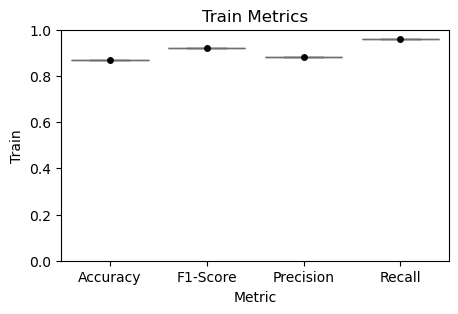

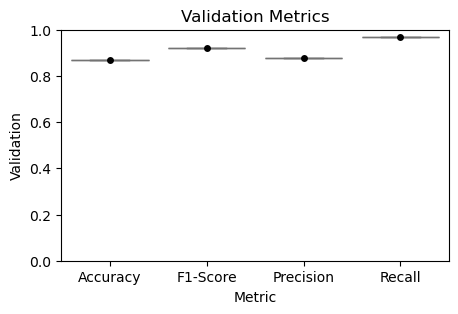

In [135]:
# Obtener las predicciones del mejor modelo
y_train_pred = best_model.predict(X_train_transformado)
y_val_pred = best_model.predict(X_val_transformado)

# Calcular todas las métricas
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)
train_f1_score = f1_score(ytrain, y_train_pred)
val_f1_score = f1_score(yval, y_val_pred)
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
                           'Train': [train_accuracy, train_f1_score, train_precision, train_recall],
                           'Validation': [val_accuracy, val_f1_score, val_precision, val_recall]})

# Diagramas de caja y bigote de las métricas
plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, x='Metric', y='Train', color='skyblue')
sns.stripplot(data=metrics_df, x='Metric', y='Train', color='black', size=5)
plt.title('Train Metrics')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, x='Metric', y='Validation', color='lightgreen')
sns.stripplot(data=metrics_df, x='Metric', y='Validation', color='black', size=5)
plt.title('Validation Metrics')
plt.ylim(0, 1)
plt.show()

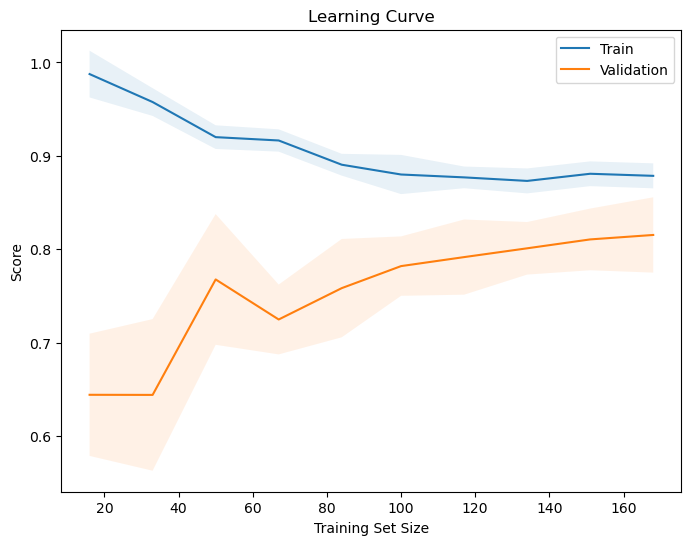

In [145]:
# Función para generar las curvas de aprendizaje
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    # Calcular los promedios y las desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3)
    plt.plot(train_sizes, val_scores_mean, label='Validation')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.3)
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Definir los tamaños de conjunto de entrenamiento a evaluar
train_sizes = np.linspace(0.1, 1.0, 10, 100)

# Generar las curvas de aprendizaje
plot_learning_curve(best_model, X_train_transformado, ytrain, cv=5, train_sizes=train_sizes)

In [137]:
print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8672985781990521
Validation Accuracy: 0.868421052631579


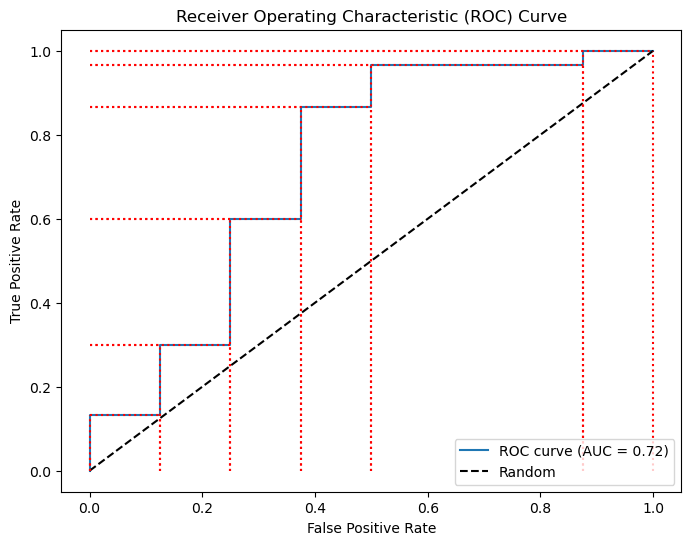

In [138]:
from sklearn import metrics

# Get the scores using decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(yval, scores_val)

#cm=confusion_matrix(ytest, y_val_pred)

# Calculate the AUC
auc = roc_auc_score(yval, scores_val)

# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')
plt.show()

In [146]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calcular el AUC
auc = roc_auc_score(yval, scores_val)

print('AUC:', auc)

AUC: 0.725


In [147]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de f1-score
f1_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular el f1-score utilizando las etiquetas predichas
    f1 = f1_score(yval, y_pred)
    # Agregar el valor del f1-score a la lista
    f1_scores.append(f1)

# Encontrar el umbral que maximiza el f1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print('Mejor umbral:', best_threshold)
print('Mejor F1-Score:', best_f1_score)

Mejor umbral: 0.002397628175346833
Mejor F1-Score: 0.9206349206349207


In [148]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de g-mean
g_mean_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular la matriz de confusión utilizando las etiquetas predichas
    tn, fp, fn, tp = confusion_matrix(yval, y_pred).ravel()
    # Calcular el g-mean utilizando los valores de la matriz de confusión
    g_mean = np.sqrt(tp / (tp + fn) * tn / (tn + fp))
    # Agregar el valor del g-mean a la lista
    g_mean_scores.append(g_mean)

# Encontrar el umbral que maximiza el g-mean
best_threshold = thresholds[np.argmax(g_mean_scores)]
best_g_mean = np.max(g_mean_scores)

print('Mejor umbral:', best_threshold)
print('Mejor G-Mean:', best_g_mean)

Mejor umbral: 0.29985698694106033
Mejor G-Mean: 0.7359800721939873


## **Versionado de datos**

## **Construcción, ajuste y evaluación de Modelos de Machine Learning**

## **Aplicación de Mejores Prácticas en el Pipeline de Modelado**

## **Estructuración y Refactorización del Código**